In [49]:
import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = "png"
import plotly.express as px
import plotly
# connected=True means it will download the latest version of plotly javascript library.
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go

import plotly.figure_factory as ff
#import cufflinks as cf

In [50]:
# import data 
data= pd.read_csv("/Users/ghaidaa/Desktop/Google-Play-Store-Apps/googleplaystore.csv")

In [51]:
#1 basic visualize data 
data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [52]:
data.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [53]:


data.columns = data.columns.str.replace(' ', '')

In [54]:

data.isna().sum()

App                 0
Category            0
Rating           1474
Reviews             0
Size                0
Installs            0
Type                1
Price               0
ContentRating       1
Genres              0
LastUpdated         0
CurrentVer          8
AndroidVer          3
dtype: int64

In [55]:
data['CurrentVer']=data.CurrentVer.fillna("Unknown")
data['AndroidVer']=data.AndroidVer.fillna("Unknown")
data['ContentRating']=data.ContentRating.fillna("Unknown")
data['Type']=data.Type.dropna()
#fill nan mean Rating  
data['Rating'].fillna((data['Rating'].mean()), inplace=True)


In [56]:
data.isna().sum()
#drop = data.Type.isna()==True
#drop.dropna()

App              0
Category         0
Rating           0
Reviews          0
Size             0
Installs         0
Type             1
Price            0
ContentRating    0
Genres           0
LastUpdated      0
CurrentVer       0
AndroidVer       0
dtype: int64

In [57]:

data.Reviews.str.isnumeric().sum() # all is numeric except one row 
data[~data.Reviews.str.isnumeric()]##check if all values reverse non-numeric

,App,Category,Rating,Reviews,Size,Installs,Type,Price,ContentRating,Genres,LastUpdated,CurrentVer,AndroidVer
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,Unknown,"February 11, 2018",1.0.19,4.0 and up,Unknown


In [58]:
data=data.drop(data.index[10472])
data["Reviews"] = data["Reviews"].astype(int)



In [59]:
data.columns


Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'ContentRating', 'Genres', 'LastUpdated', 'CurrentVer',
       'AndroidVer'],
      dtype='object')

In [60]:
data.sample(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,ContentRating,Genres,LastUpdated,CurrentVer,AndroidVer
2060,Rhythm Patrol,FAMILY,4.300000,4207,26M,"100,000+",Free,0,Everyone,Music;Music & Video,"July 23, 2018",2.180723,4.1 and up
5571,Summer Camp Island AR,FAMILY,3.600000,740,71M,"50,000+",Free,0,Everyone,Simulation,"July 5, 2018",1.0.2,4.4 and up
8148,signály.cz,SOCIAL,4.193338,38,881k,"1,000+",Free,0,Everyone,Social,"May 9, 2013",1.1,2.2 and up
8251,LEGO Batman: DC Super Heroes,FAMILY,4.200000,2557,5.8M,"50,000+",Paid,$4.99,Everyone 10+,Adventure;Action & Adventure,"May 9, 2016",Varies with device,4.0.3 and up
4659,U of I Community Credit Union,FINANCE,3.700000,52,13M,"5,000+",Free,0,Everyone,Finance,"May 4, 2018",4.16.10,4.4 and up


In [61]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
App,10840,9659,ROBLOX,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Category,10840,33,FAMILY,1972,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rating,10840.0,NaN,NaN,NaN,4.191972,0.478907,1.0,4.1,4.2,4.5,5.0
Reviews,10840.0,NaN,NaN,NaN,444152.896033,2927760.603886,0.0,38.0,2094.0,54775.5,78158306.0
Size,10840,461,Varies with device,1695,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Installs,10840,21,"1,000,000+",1579,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Type,10839,2,Free,10039,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Price,10840,92,0,10040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ContentRating,10840,6,Everyone,8714,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Genres,10840,119,Tools,842,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [62]:
data.head(5)
data.isna().sum()

App              0
Category         0
Rating           0
Reviews          0
Size             0
Installs         0
Type             1
Price            0
ContentRating    0
Genres           0
LastUpdated      0
CurrentVer       0
AndroidVer       0
dtype: int64

In [17]:


data.describe()

,Rating,Reviews
count,10840.000000,1.084000e+04
mean,4.191972,4.441529e+05
std,0.478907,2.927761e+06
min,1.000000,0.000000e+00
25%,4.100000,3.800000e+01
50%,4.200000,2.094000e+03
75%,4.500000,5.477550e+04
max,5.000000,7.815831e+07


In [18]:
data.App.unique()

array(['Photo Editor & Candy Camera & Grid & ScrapBook',
       'Coloring book moana',
       'U Launcher Lite – FREE Live Cool Themes, Hide Apps', ...,
       'Parkinson Exercices FR', 'The SCP Foundation DB fr nn5n',
       'iHoroscope - 2018 Daily Horoscope & Astrology'], dtype=object)

In [19]:
data.Rating.unique()

array([4.1       , 3.9       , 4.7       , 4.5       , 4.3       ,
       4.4       , 3.8       , 4.2       , 4.6       , 3.2       ,
       4.        , 4.19333832, 4.8       , 4.9       , 3.6       ,
       3.7       , 3.3       , 3.4       , 3.5       , 3.1       ,
       5.        , 2.6       , 3.        , 1.9       , 2.5       ,
       2.8       , 2.7       , 1.        , 2.9       , 2.3       ,
       2.2       , 1.7       , 2.        , 1.8       , 2.4       ,
       1.6       , 2.1       , 1.4       , 1.5       , 1.2       ])

In [20]:



data.Installs.unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [21]:
data.Reviews.unique()


array([   159,    967,  87510, ...,    603,   1195, 398307])

In [22]:
data.Category.value_counts()

FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
LIBRARIES_AND_DEMO       85
AUTO_AND_VEHICLES        85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
Name: Category, dtype: int64

In [23]:
data.Category.unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [24]:
#data.shape
data.isna().sum()

App              0
Category         0
Rating           0
Reviews          0
Size             0
Installs         0
Type             1
Price            0
ContentRating    0
Genres           0
LastUpdated      0
CurrentVer       0
AndroidVer       0
dtype: int64

In [64]:
#delete any digit like "plus" or "comma"
signals=['+',',']

for i in signals :
     for j in ['Installs']:
        data[j]=data[j].str.replace(i,'')
data.head()
# delete last digit in price column -$-
for k in ['Price']:
        data[k]=data[k].str.replace('$','')


<ipython-input-64-4eda66463461>:6: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.

<ipython-input-64-4eda66463461>:10: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.



In [65]:
data["Installs"] = data["Installs"].astype(int)

In [66]:
data = data.Price.astype(float)


In [28]:
data.Rating.value_counts()

4.193338    1474
4.400000    1109
4.300000    1076
4.500000    1038
4.200000     952
4.600000     823
4.100000     708
4.000000     568
4.700000     499
3.900000     386
3.800000     303
5.000000     274
3.700000     239
4.800000     234
3.600000     174
3.500000     163
3.400000     128
3.300000     102
4.900000      87
3.000000      83
3.100000      69
3.200000      64
2.900000      45
2.800000      42
2.600000      25
2.700000      25
2.500000      21
2.300000      20
2.400000      19
1.000000      16
2.200000      14
1.900000      13
2.000000      12
2.100000       8
1.800000       8
1.700000       8
1.600000       4
1.500000       3
1.400000       3
1.200000       1
Name: Rating, dtype: int64

In [29]:
# convert column - last Updated to datetime type
data['LastUpdated'] = pd.to_datetime(data['LastUpdated'])
data['LastUpdated']


0       2018-01-07
1       2018-01-15
2       2018-08-01
3       2018-06-08
4       2018-06-20
           ...    
10836   2017-07-25
10837   2018-07-06
10838   2017-01-20
10839   2015-01-19
10840   2018-07-25
Name: LastUpdated, Length: 10840, dtype: datetime64[ns]

In [30]:
# divided Last Updated columnn to three diffrent day , month , year
data['LastUpdated_Day']=data['LastUpdated'].dt.day
data['LastUpdated_Month']=data['LastUpdated'].dt.month
data['lastUpdated_Year']=data['LastUpdated'].dt.year

In [31]:
# drop column after edit
data.drop('LastUpdated', axis=1, inplace=True)

In [32]:
duplicate = data.duplicated()
print(duplicate.sum())

483


In [33]:
# drop duplicate rows by name app but second duplicate row 

data = data.drop_duplicates(keep='last',subset=['App'])
data[data.duplicated(['App'])]
data.shape
data[data.duplicated(['App'])]
duplicate = data.duplicated()
print(duplicate.sum())

0


In [34]:
# show duplicate app
data[data.duplicated(['App'])]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,ContentRating,Genres,CurrentVer,AndroidVer,LastUpdated_Day,LastUpdated_Month,lastUpdated_Year


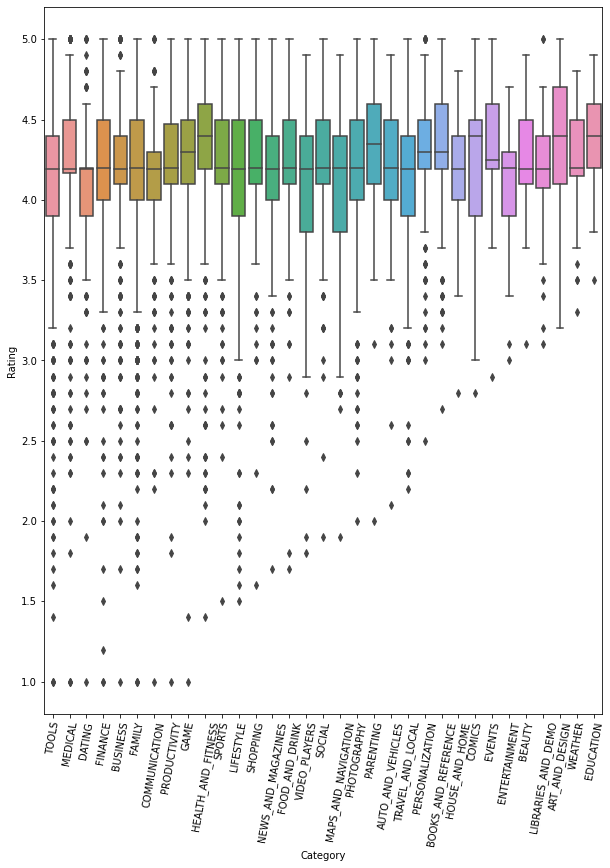

In [35]:
#show rating with catew
plt.figure(figsize=(10,13))
sns.boxplot(y='Rating',x='Category',data = data.sort_values('Rating',ascending=True))
plt.xticks(rotation=80);


In [36]:
data['Type'].value_counts()

Free    8904
Paid     754
Name: Type, dtype: int64

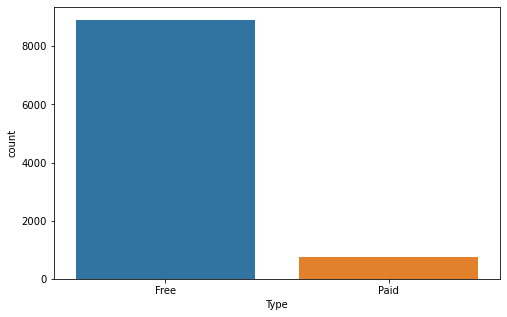

In [37]:
plt.rcParams['figure.figsize'] = (8,5)
sns.countplot(x='Type',data=data);



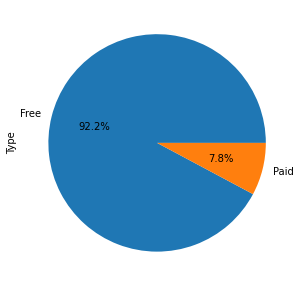

In [38]:
data["Type"].value_counts().plot.pie(autopct = "%1.1f%%");

In [39]:
## data['Category'].value_counts().head(10).plot.pie(autopct = "%1.1f%%");

''

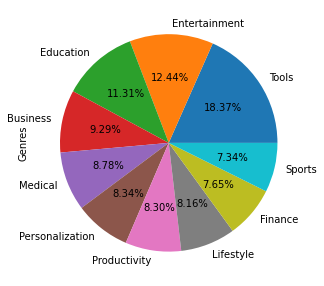

In [40]:
data['Genres'].value_counts().head(10).plot.pie(autopct = "%1.02f%%")
;

In [41]:
plt.rcParams['figure.figsize'] = (20, 10)


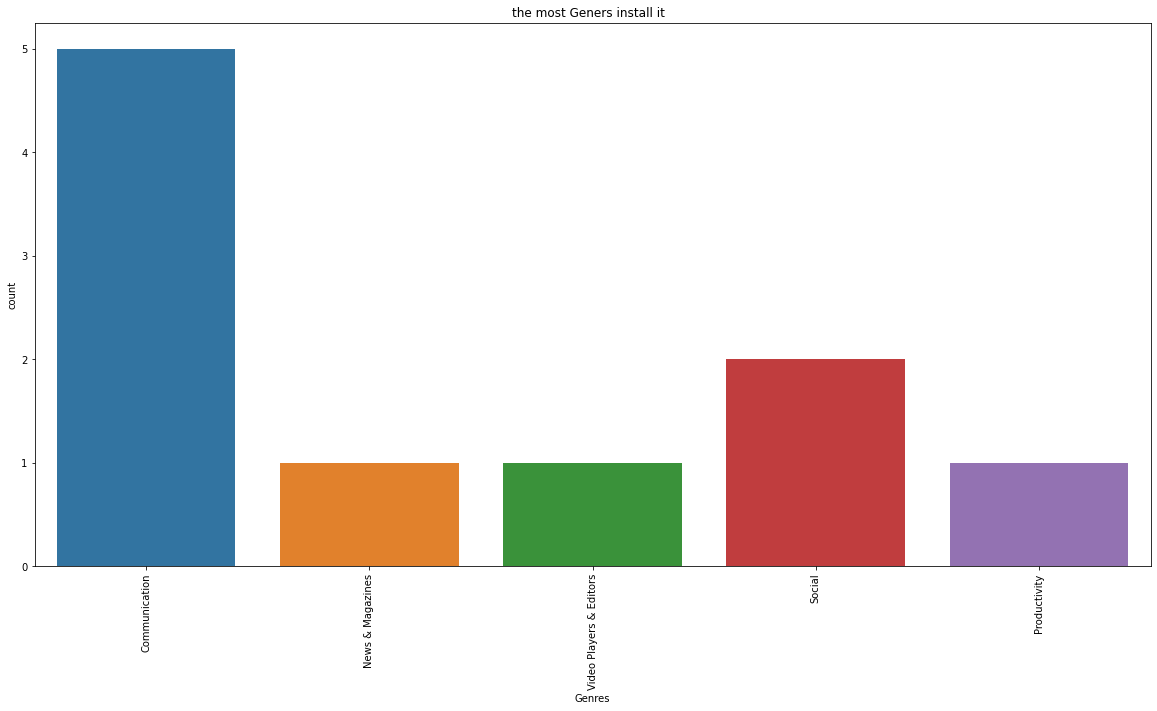

In [42]:
#data1=data.Genres.value_counts().head(10)
sns.countplot(x='Genres',data=data.sort_values('Installs',ascending=False).head(10));
plt.title('the most Geners install it  ')
plt.xticks(rotation=90);

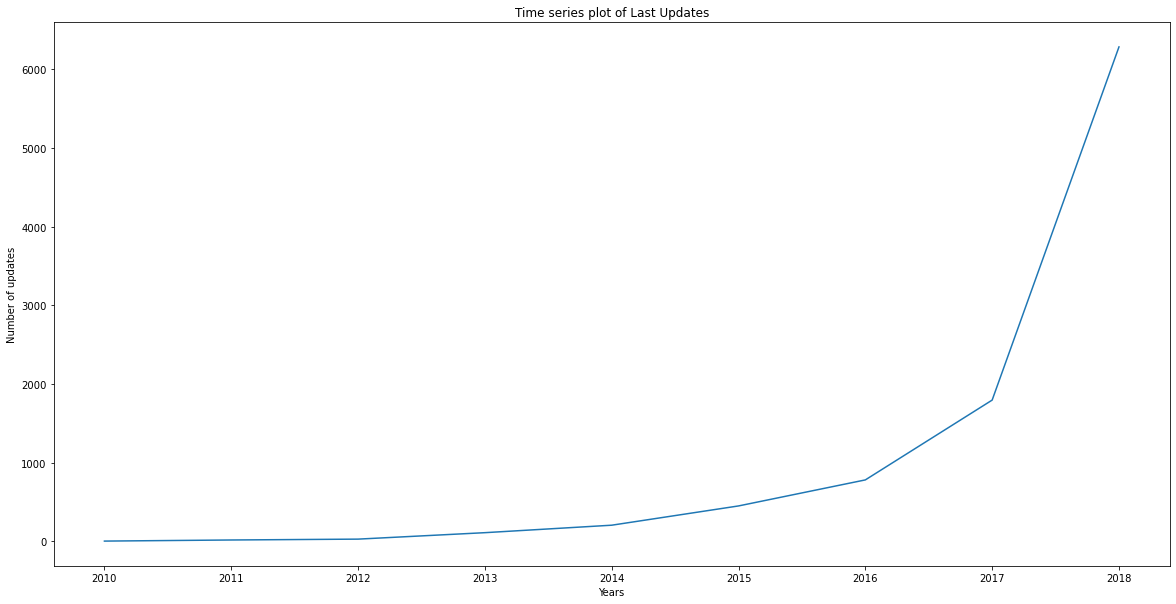

In [43]:

CountUpdate=data['lastUpdated_Year'].value_counts()
CountUpdate.plot();
plt.rcParams['figure.figsize'] = (20, 10)
plt.xlabel("Years");
plt.ylabel("Number of updates");
plt.title("Time series plot of Last Updates");

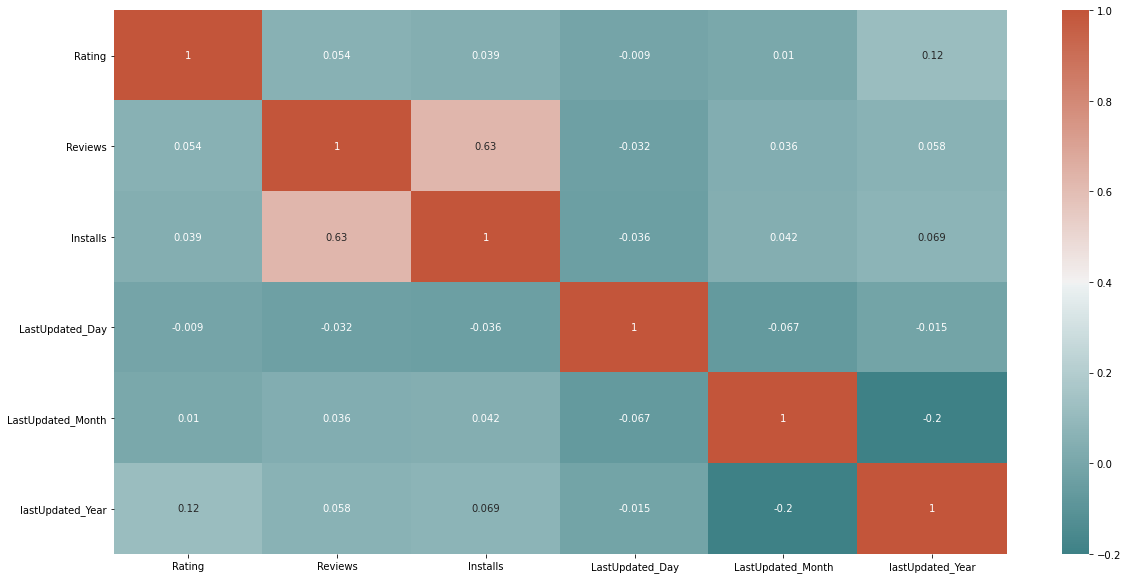

In [44]:

corrmat = data.corr()
#sns.color_palette("flare", as_cmap=True)
p =sns.heatmap(corrmat, annot=True, cmap=sns.diverging_palette(200, 20, as_cmap=True))

<AxesSubplot:ylabel='Category'>

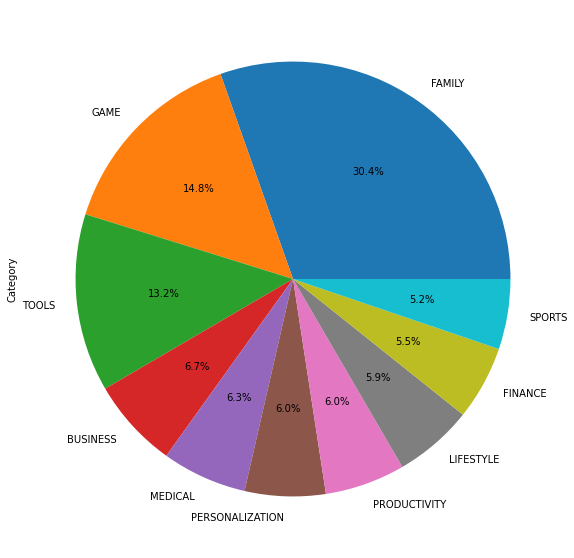

In [45]:
data['Category'].value_counts().head(10).plot.pie(autopct = "%1.1f%%");1


In [ ]:
#top_Category = data.groupby(by = 'Category')['Type'].head(10).reset_index()
#top_Category

#top_Category = data.groupby(by = 'Category').agg({'Installs':'sum', 'Type':" ".join(data.Type)}).sort_values('Installs', ascending = False).head(10).reset_index()
#data=data.
#top_Category #agg({'Installs': ['sum'])
#fig = px.bar(top_Category.sort_values('Installs',ascending = False), x='Category' , y='Installs',color=top_Category.Type ,title="Free VS Paid")
#fig.show()


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Everyone'),
  Text(1, 0, 'Teen'),
  Text(2, 0, 'Everyone 10+'),
  Text(3, 0, 'Mature 17+'),
  Text(4, 0, 'Adults only 18+'),
  Text(5, 0, 'Unrated')])

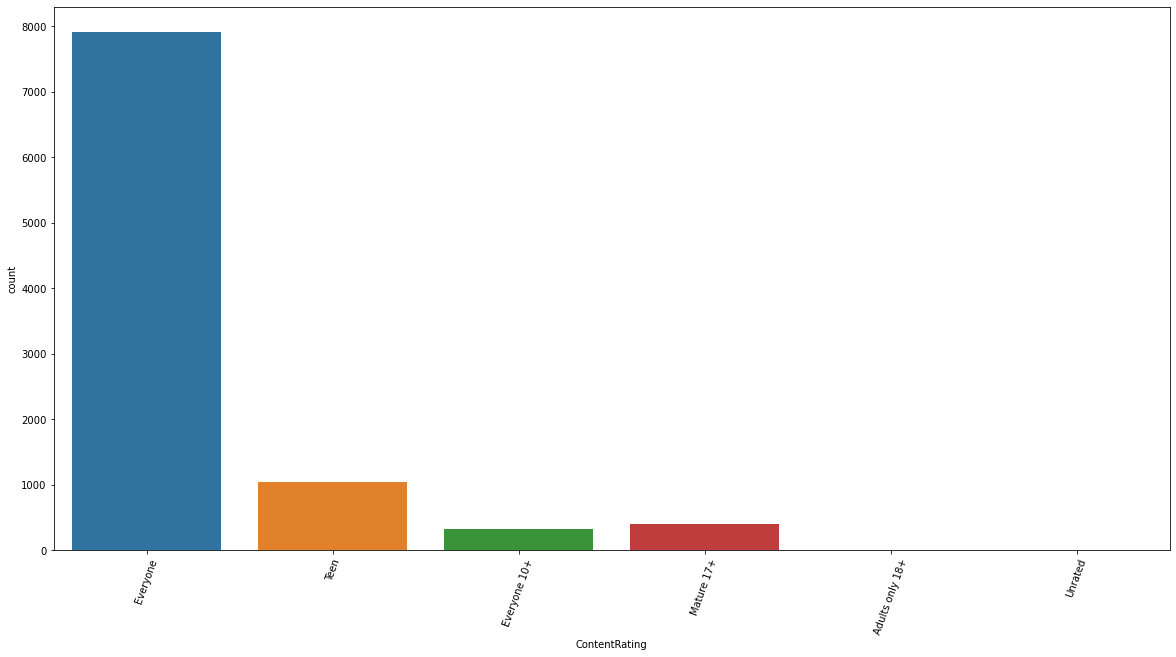

In [47]:
plt.rcParams['figure.figsize'] = (20, 10)
sns.countplot(x='ContentRating',data=data);
#sns.color_palette("flare", as_cmap=True)                                            
plt.xticks(rotation=70)